<a href="https://colab.research.google.com/github/p15avgo/Convolution-Neural-Network-code/blob/master/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation, Dropout, Flatten, Dense
from keras import backend as K 
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,multilabel_confusion_matrix,classification_report
import itertools
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root = ('/content/drive/MyDrive/release_v0/images')



In [ ]:
batch_size = 32
IMAGE_SHAPE = 64,64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3,rescale=1/255)
image_data_train = image_generator.flow_from_directory(str(data_root),target_size=IMAGE_SHAPE)


Found 2013 images belonging to 34 classes.


In [ ]:
train_image_generator = image_generator.flow_from_directory(str(data_root),subset='training',target_size=IMAGE_SHAPE,shuffle=True,batch_size=batch_size,class_mode='categorical') # Generator for our training data
validation_image_generator = image_generator.flow_from_directory(str(data_root),subset='validation',target_size=IMAGE_SHAPE,shuffle=True,batch_size=batch_size,class_mode='categorical')# Generator for our validation data


Found 1420 images belonging to 34 classes.
Found 593 images belonging to 34 classes.


In [ ]:
for image_batch, label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 34)


In [ ]:
backend.set_image_data_format('channels_last')

In [ ]:
classifier = tf.keras.Sequential()

In [ ]:
model = tf.keras.Sequential()

In [ ]:

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=34,activation='softmax'))


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)      

In [ ]:
predictions = model(image_batch)

predictions.shape

TensorShape([32, 34])

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [ ]:

batch_stats_callback = CollectBatchStats() 
history = model.fit(image_data_train,
                    steps_per_epoch=np.ceil(train_image_generator.n/batch_size),
                    validation_data = validation_image_generator,
                    epochs=70,callbacks = [batch_stats_callback],
                    verbose=1)

Epoch 1/70
45/45 [==============================] - 352s 8s/step - loss: 3.4495 - accuracy: 0.0312 - val_loss: 3.5048 - val_accuracy: 0.0472
Epoch 2/70
45/45 [==============================] - 77s 2s/step - loss: 3.4734 - accuracy: 0.0312 - val_loss: 3.4714 - val_accuracy: 0.0455
Epoch 3/70
45/45 [==============================] - 26s 593ms/step - loss: 3.4359 - accuracy: 0.0625 - val_loss: 3.4466 - val_accuracy: 0.0455
Epoch 4/70
45/45 [==============================] - 17s 387ms/step - loss: 3.2376 - accuracy: 0.0938 - val_loss: 3.2157 - val_accuracy: 0.1012
Epoch 5/70
45/45 [==============================] - 14s 319ms/step - loss: 2.7274 - accuracy: 0.1875 - val_loss: 2.6937 - val_accuracy: 0.1821
Epoch 6/70
45/45 [==============================] - 13s 292ms/step - loss: 2.8442 - accuracy: 0.0625 - val_loss: 2.5386 - val_accuracy: 0.1872
Epoch 7/70
45/45 [==============================] - 13s 294ms/step - loss: 2.3586 - accuracy: 0.2500 - val_loss: 2.5064 - val_accuracy: 0.1922
Epoc

In [ ]:
history.history

{'accuracy': [0.03125,
  0.03125,
  0.0625,
  0.09375,
  0.1875,
  0.0625,
  0.25,
  0.25,
  0.21875,
  0.1875,
  0.1875,
  0.25,
  0.375,
  0.1875,
  0.3125,
  0.3125,
  0.28125,
  0.28125,
  0.34375,
  0.1875,
  0.4375,
  0.21875,
  0.375,
  0.375,
  0.4375,
  0.53125,
  0.4375,
  0.4375,
  0.25,
  0.28125,
  0.34375,
  0.4137931168079376,
  0.59375,
  0.46875,
  0.5,
  0.46875,
  0.5625,
  0.46875,
  0.46875,
  0.37931033968925476,
  0.4375,
  0.5625,
  0.65625,
  0.53125,
  0.46875,
  0.65625,
  0.6875,
  0.625,
  0.5,
  0.65625,
  0.625,
  0.6875,
  0.6875,
  0.625,
  0.6551724076271057,
  0.71875,
  0.8125,
  0.71875,
  0.6875,
  0.6875,
  0.6875,
  0.71875,
  0.78125,
  0.75,
  0.65625,
  0.78125,
  0.625,
  0.5625,
  0.71875,
  0.6875],
 'loss': [3.449474334716797,
  3.473431348800659,
  3.435903549194336,
  3.237593650817871,
  2.727409839630127,
  2.8441734313964844,
  2.358588218688965,
  2.274710178375244,
  2.3897018432617188,
  2.3641724586486816,
  2.3908190727233887,
  

In [ ]:
train_loss,train_acc = model.evaluate(train_image_generator,steps=45)
test_loss, test_acc = model.evaluate(validation_image_generator,steps=32)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

32/32 [==============================] - 4s 114ms/step - loss: 0.3916 - accuracy: 0.8938
Train: 0.896, Test: 0.894


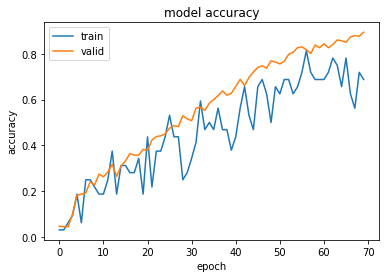

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

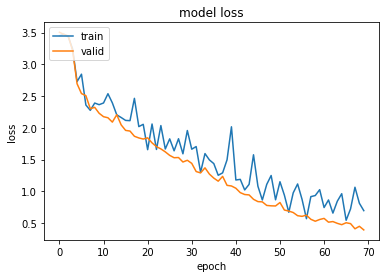

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
class_names = sorted(image_data_train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['A1L', 'A2L', 'A3L', 'Adl', 'Ael', 'Fal', 'Fbl', 'Fcl', 'Fdl',
       'Fel', 'Ffl', 'Fgl', 'Fhl', 'Fil', 'Fll', 'Fml', 'Gal', 'Gbl',
       'Gcl', 'Gdl', 'Ggl', 'Gzl', 'Nal', 'Nbl', 'Ncl', 'Ndl', 'Nel',
       'Nfl', 'Ngl', 'Nhl', 'Nil', 'Nll', 'Nml', 'New'], dtype='<U3')

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [ ]:
label_id = np.argmax(label_batch, axis=-1)

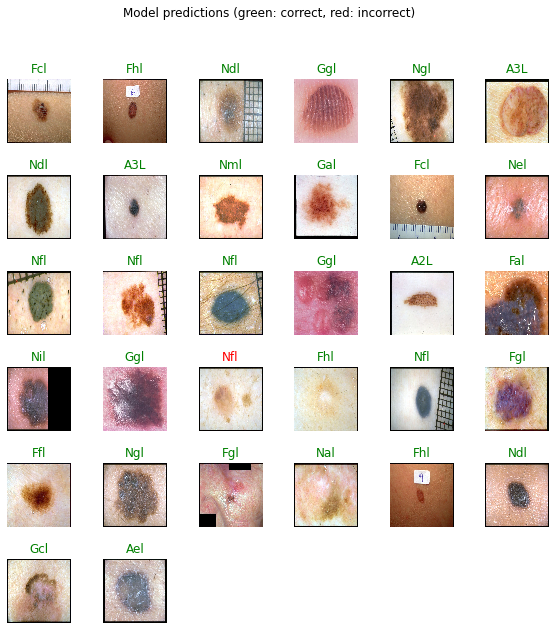

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(6,6,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
print(len(predicted_batch))
print(len(validation_image_generator))

32
19


In [ ]:
cm = confusion_matrix(y_true=label_id,y_pred=(predicted_id))

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = []

Confusion matrix, without normalization
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


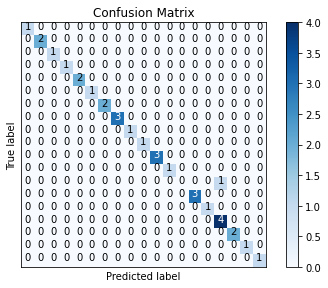

In [ ]:
plot_confusion_matrix(cm=cm ,classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
print(classification_report(y_true=label_id,y_pred=(predicted_id)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         1
          25       1.00      1.00      1.00         3
          26       1.00      1.00      1.00         1
          27       0.80      1.00      0.89         4
          28       1.00      1.00      1.00         2
          30       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
